# **提示链模式概述**
  - 提示链也称为流水线模式，用于处理复杂任务，通过将问题分解为多个子问题，逐步解决。
  - 每个子问题通过专门设计的提示处理，输出作为下一个提示的输入。
  - 提示链提高了模块化和清晰度，增强了处理过程的稳定性和可解释性。
  - 支持与外部知识、工具、API等交互，扩展了LLM的能力。
  - 适合构建能够自主规划、推理和动态应对环境的智能代理。

- **单个提示的局限性**
  - 复杂任务用单一提示容易导致模型难以处理约束和指令。
  - 潜在的指令忽略、上下文漂移和认知负荷增加，降低准确性和可靠性。
  - 例如，长篇总结或多任务分析会出现响应不准确或信息缺失。

- **通过顺序分解增强可靠性**
  - 将复杂任务分解为多个步骤，每步专注于特定子任务。
  - 例如市场研究报告总结分为：总结关键发现 → 识别趋势和数据点 → 编写简明邮件。
  - 每步简化认知负担，提升准确度和可靠性。
  - 每步可分配不同角色，明确职责。

- **结构化输出的重要性**
  - 保障步骤间数据传递的完整性。
  - 使用JSON或XML等结构化格式避免歧义和格式错误。
  - 示例中用JSON格式表示趋势及其支持数据。
  - 结构化数据可被精确解析并传递到后续步骤，减少错误。

- **整体效益**
  - 通过提示链，提升多步任务的准确性、可控性和鲁棒性。
  - 有助于构建复杂、多功能的AI应用和智能代理系统。

例如，趋势识别步骤的输出可以格式化为 JSON 对象：
```json
{
  "trends": [
    {
      "trend_name": "AI驱动的个性化",
      "supporting_data": "73%的消费者更愿意与品牌合作"
    },
    {
      "trend_name": "可持续和道德品牌",
      "supporting_data": "带有ESG相关声明的产品销量增长了28%"
    }
  ]
}
```

## 实用应用与用例总结

- **信息处理工作流**
  - 分步骤处理原始信息，如文档摘要、关键实体提取、数据库查询和报告生成。
  - 适用于自动内容分析、AI驱动的研究助手和复杂报告生成。

- **复杂查询应答**
  - 分解复杂问题，逐步检索和推理，实现多步骤综合回答。
  - 适合多源信息融合、多任务推理的AI系统。

- **数据提取与转化**
  - 将非结构化文本转成结构化数据，通过迭代过程校验和完善。
  - 适用场景包括表单、发票、邮件数据抽取和OCR问题处理。
  - 结合数学计算与外部计算工具，提升准确率。

- **内容生成工作流**
  - 按相位分解复杂内容的创作过程，包含选题、写作和审校。
  - 支持创意叙事、技术文档及结构化文本生成。

- **带状态的对话代理**
  - 通过链式提示构建上下文，维护多轮对话的连贯性与上下文记忆。
  - 支持意图识别、状态更新和持续对话管理。

- **代码生成与改进**
  - 将代码任务拆解成离散步骤，如伪代码生成、代码初稿、错误排查和文档编写。
  - 适合AI辅助软件开发，通过模块化降低复杂度。

- **多模态与多步骤推理**
  - 分解多模态数据（如图像和表格）中的信息处理任务。
  - 结合图像文字提取、标签联系及表格式信息解释，实现综合理解。

## 实践示例

```
pip install langchain langchain-community langchain-openai langgraph
```



In [ ]:
import os
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Initialize the Language Model (using ChatOpenAI is recommended)
llm = ChatOpenAI(base_url="http://127.0.0.1:1234/v1", temperature=0, api_key="not-needed")
llm

ChatOpenAI(profile={'max_input_tokens': 16385, 'max_output_tokens': 4096, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': False, 'structured_output': False, 'image_url_inputs': False, 'pdf_inputs': False, 'pdf_tool_message': False, 'image_tool_message': False, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x0000020F6516CF50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000020F6516D310>, root_client=<openai.OpenAI object at 0x0000020F6516C410>, root_async_client=<openai.AsyncOpenAI object at 0x0000020F6516D090>, temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='http://127.0.0.1:1234/v1')

In [6]:
# --- Prompt 1: Extract Information ---

prompt_extract = ChatPromptTemplate.from_template(
    "Extract the technical specifications from the following text:\n\n{text_input}"
)

prompt_extract

ChatPromptTemplate(input_variables=['text_input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text_input'], input_types={}, partial_variables={}, template='Extract the technical specifications from the following text:\n\n{text_input}'), additional_kwargs={})])

In [7]:
# --- Prompt 2: Transform to JSON ---

prompt_transform = ChatPromptTemplate.from_template(
    "Transform the following specifications into a JSON object with 'cpu', 'memory', and 'storage' as keys:\n\n{specifications}"
)

In [9]:
# --- Build the Chain using LCEL ---
# The StrOutputParser() converts the LLM's message output to a simple string.

extraction_chain = prompt_extract | llm | StrOutputParser()
extraction_chain

ChatPromptTemplate(input_variables=['text_input'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text_input'], input_types={}, partial_variables={}, template='Extract the technical specifications from the following text:\n\n{text_input}'), additional_kwargs={})])
| ChatOpenAI(profile={'max_input_tokens': 16385, 'max_output_tokens': 4096, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': False, 'structured_output': False, 'image_url_inputs': False, 'pdf_inputs': False, 'pdf_tool_message': False, 'image_tool_message': False, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x0000020F6516CF50>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000020F6516D310>, root_client=<openai.OpenAI object at 0x00

In [10]:
# The full chain passes the output of the extraction chain into the 'specifications'
# variable for the transformation prompt.

full_chain = (
    {"specifications": extraction_chain}
    | prompt_transform
    | llm
    | StrOutputParser()
)

In [11]:
# --- Run the Chain ---

input_text = "The new laptop model features a 3.5 GHz octa-core processor, 16GB of RAM, and a 1TB NVMe SSD."

# Execute the chain with the input text dictionary.

final_result = full_chain.invoke({"text_input": input_text})

print("\n--- Final JSON Output ---")

print(final_result)


--- Final JSON Output ---
<think>
```json
{
  "cpu": "3.5 GHz octa-core processor",
  "memory": "16GB of RAM",
  "storage": "1TB NVMe SSD"
}
```


这段 Python 代码演示了如何使用 LangChain 库来处理文本。它利用了两个独立的提示：一个从输入字符串中提取技术规格，另一个将这些规格格式化为 JSON 对象。ChatOpenAI 模型被用来与语言模型进行交互，StrOutputParser 确保输出是可直接使用的字符串格式。LangChain 表达式语言（LCEL），也就是代码中的 | 符号，被用来优雅地将这些组件「链接」在一起。代码首先构建了一个 extraction_chain，负责提取规格。然后，full_chain 接收前一个链的输出，并将其作为输入传给负责转换格式的提示。最后，我们提供了一段描述笔记本电脑的示例文本，并通过 invoke 方法让 full_chain 按顺序执行这两个步骤，打印出最终提取并格式化好的 JSON 字符串。

## 上下文工程与提示工程的区别
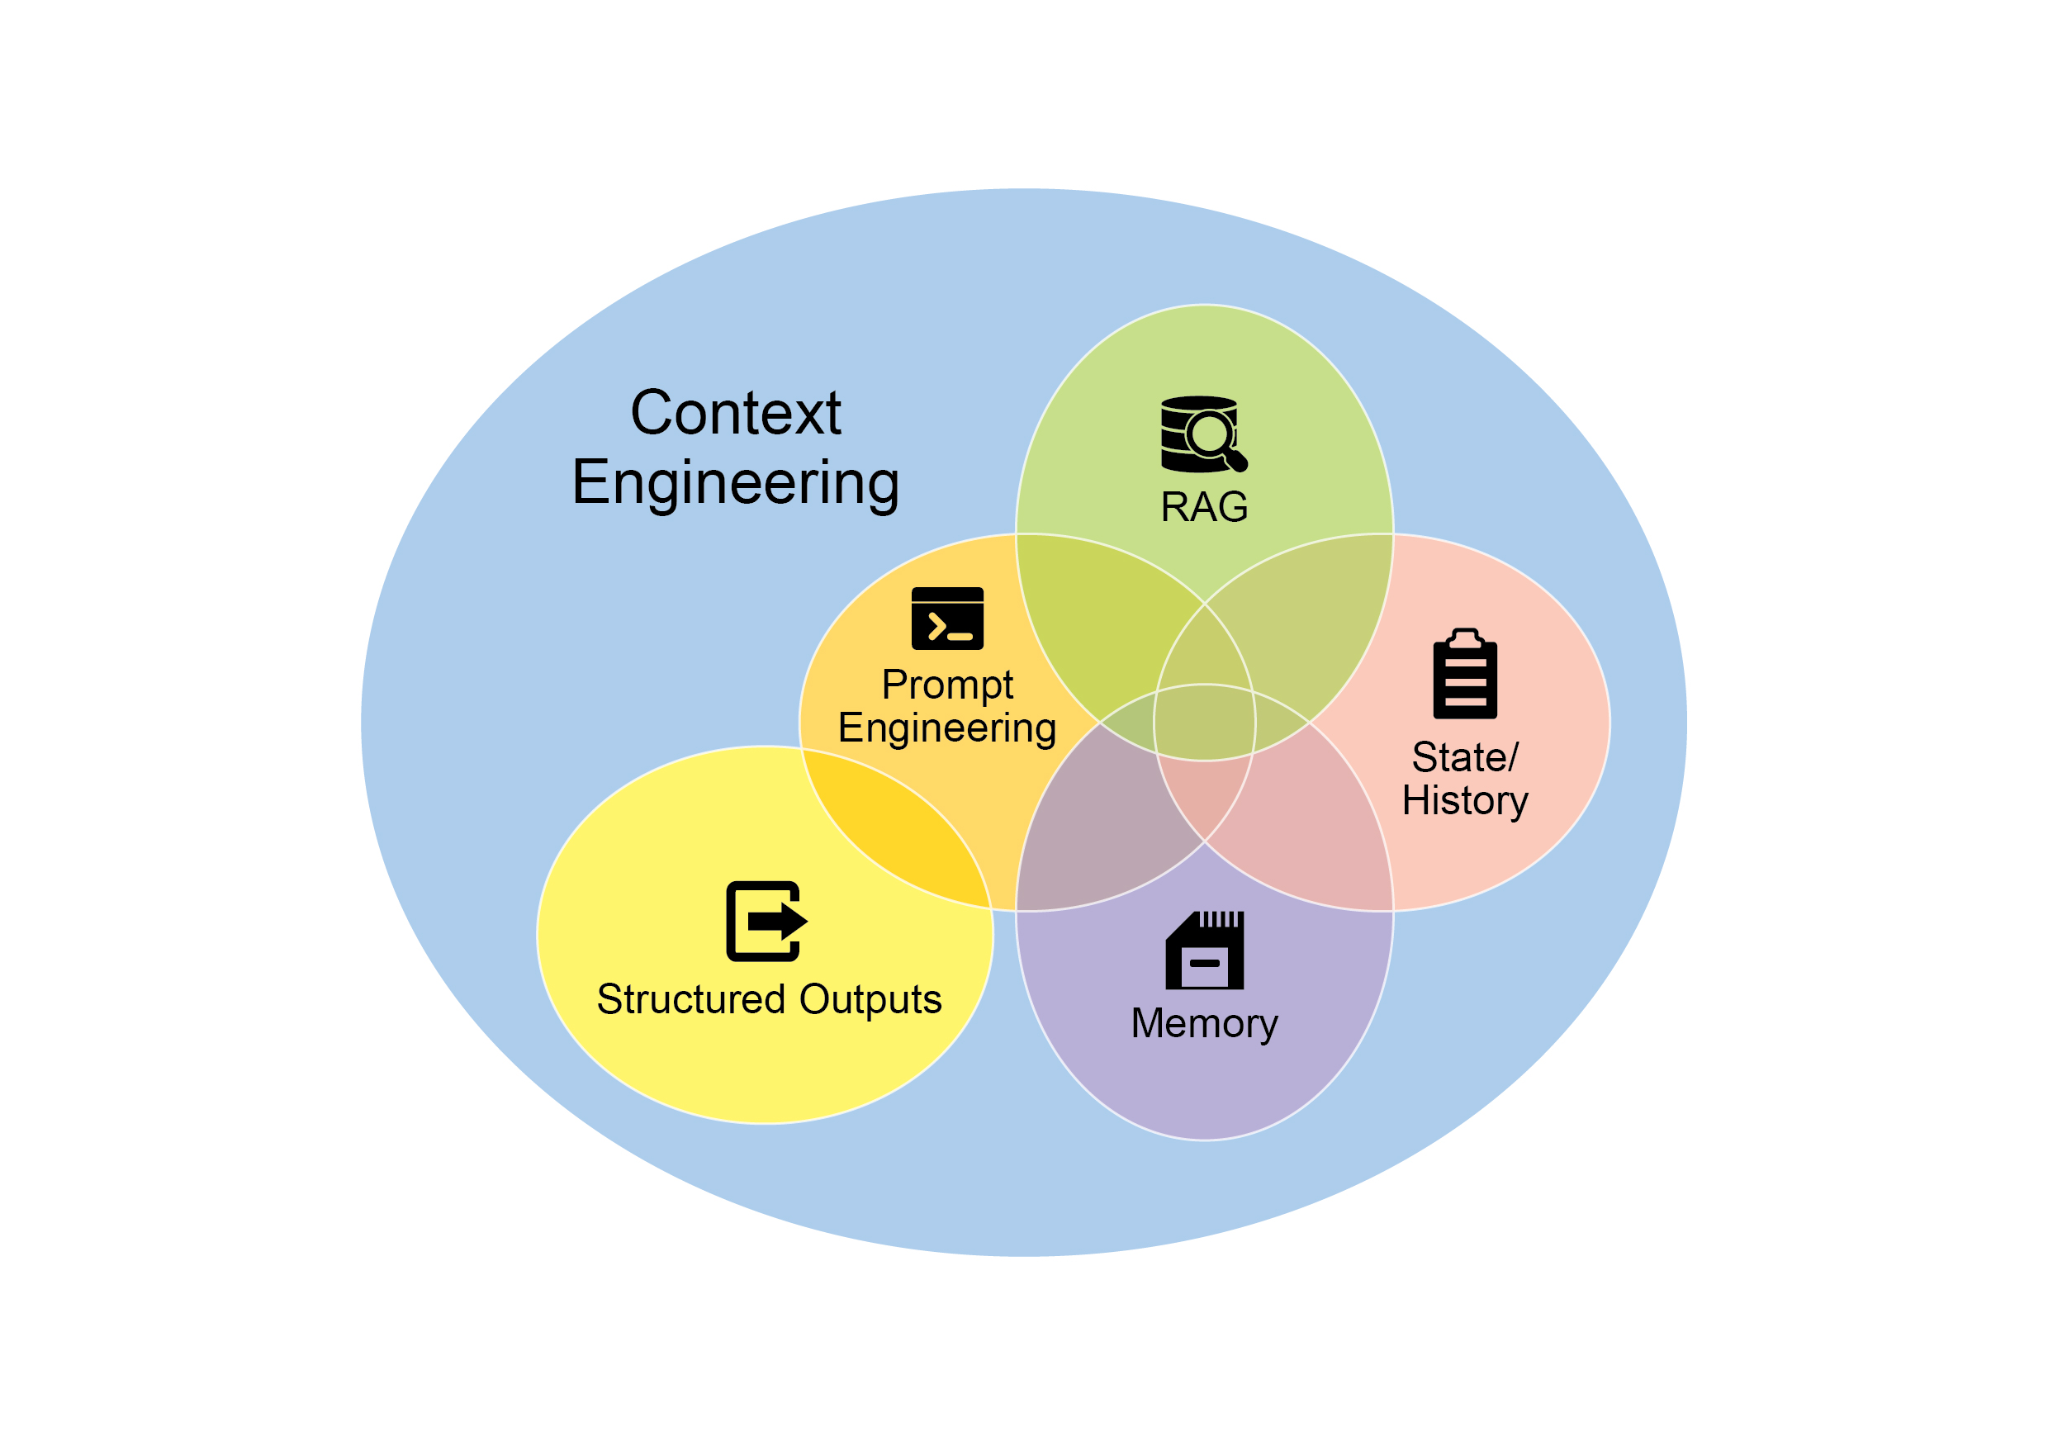
  - 上下文工程是为AI模型在生成token前设计、构建和传递完整信息环境的系统性学科。
  - 它强调模型输出的质量更多依赖于提供的上下文丰度，而非模型架构本身。
  - 扩展了传统提示工程的范畴，包含系统提示、结构化输出、记忆、检索增强生成（RAG）和状态/历史信息等层面。

- **上下文工程的重要性**
  - 通过整合用户日历、专业关系、历史交互和外部文档数据，构建全面的操作环境，提升模型的输出相关性、个性化和实用性。
  - 即使是有限或构造不良的视角，也能显著提升性能。

- **实现上下文工程的实践**
  - 利用自动调优系统（如Google Vertex AI提示优化器）通过样本输入、预定义评估指标和模板，自动评估和改进提示和系统指令。
  - 建立反馈循环持续提升上下文质量。

- **上下文工程的作用与目标**
  - 使AI系统不只是回答问题，而是构建一个包含多维度信息的全面操作画面，提升多任务、多步骤Agent系统能力。
  - 使Stateless（无状态）聊天机器人转型为具备情境感知的高级系统。

- **多步骤提示链的必要性**
  - 单一提示难以处理复杂任务，易出现忘记指令、丢失上下文、信息错误等问题。
  - 多阶段链式提示将复杂任务拆分为小子任务，逐步传递输出，加强逻辑控制和结果准确性。

- **提示链设计要点**
  - 标准化拆解复杂问题，设计专注具体目标的子提示。
  - 模块化和分治策略，便于调试和集成外部工具及结构化数据。
  - 适合复杂需要多任务处理与状态维持的Agent系统。

- **总结**
  - 将上下文视为第一要素，赋予智能体对已知事实、时间、历史和环境的理解能力。
  - 是推动智能体从简单问答走向高效、多维场景复合应用的关键方法。

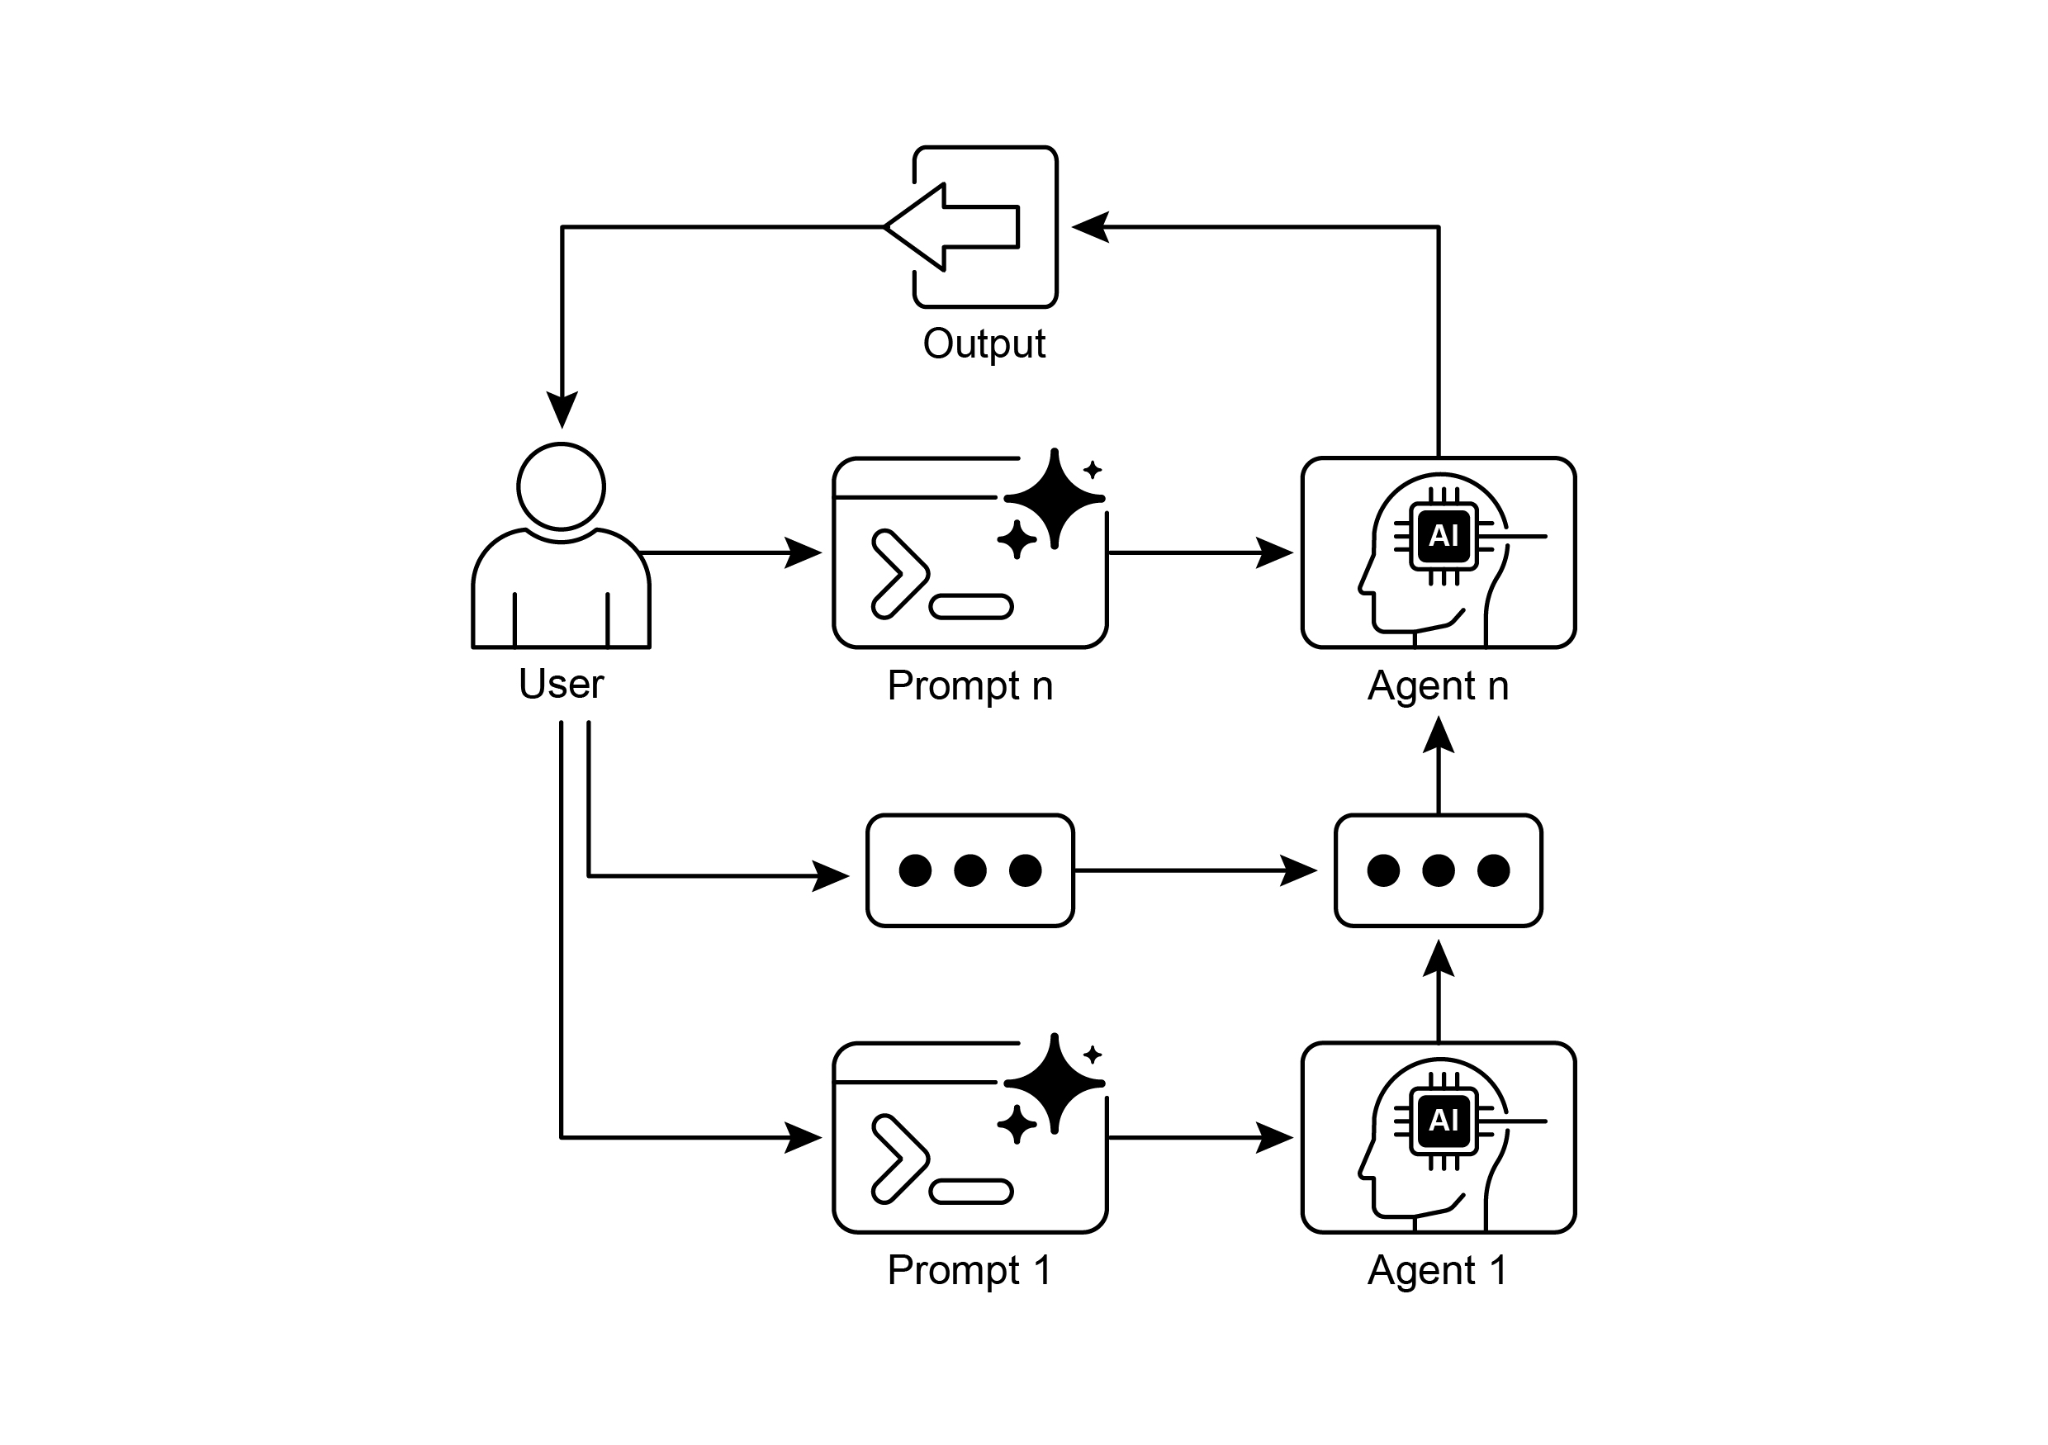